# Implementación y agregación de segmentadores

## Grupo 18 equipo 6
- Gregorio Ferrer Cebrian
- Hector Lopez Almazan
- Jon Ander Reche Urrutia
- Luis Cabello de los Cobos de Toro

El proposito de esta actividad es segmentar lagos que aparecen en imágenes.

## Segmentadores elegidos
- Contornos Activos
- Kmeans
- Felzenswabft
- GraphCut

In [1]:
from utils import *
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [28]:
filenames = ['OtroLago.JPG', 'lago.jpg', 'lagoMontaña.jpg', 'zakopane.jpg']
masks_filenames = ['OtroLago_mask.JPG', 'lago_mask_3.png', 'lagoMontaña_mask.jpg', 'zakopane_maks.jpg']

root = 'Imagenes/'
images_paths = [root + name for name in filenames]
mask_paths = [root + name for name in masks_filenames]

In [25]:
plt.rcParams['figure.figsize']= 10, 10

# Active Contours
Es uno de los conocidos segmentadores de serpiente, se ajusta mediante una curva cerrada a un objeto previa selección del area a ajustarse. En este caso debido a la longitud de los lagos se ha propuesto utilizar elipses a modo de area de selección.

/home/hectorlopez/Datos/Master/Percepcion_computacional/Actividades/Actividad_3/utils.py:98: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  alpha=0.0005, beta = 3, gamma = 0.005);
/home/hectorlopez/Datos/Master/Percepcion_computacional/Actividades/Actividad_3/utils.py:66: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  alpha=0.020, beta = 30, gamma = 0.0001);
/home/hectorlopez/Datos/Master/Percepcion_computacional/Actividades/Actividad_3/utils.py:83: FutureWarning: The coord

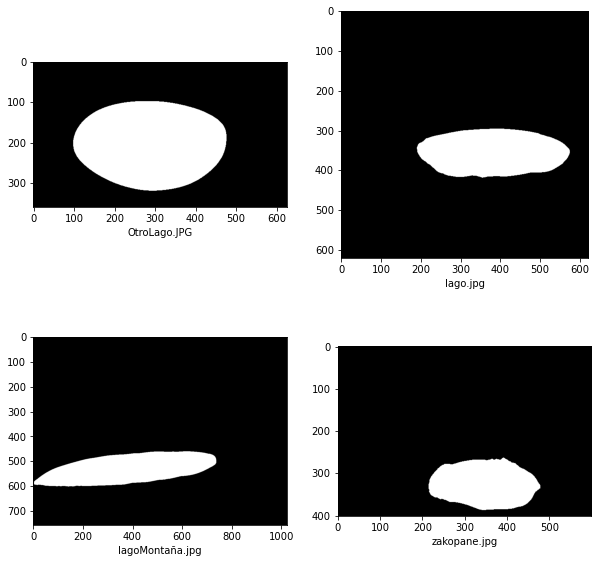

In [18]:
active_contours = ActiveContour()
active_contours_segmentations = []

for idx, path in enumerate(images_paths):
    image = plt.imread(path)
    segmentation = active_contours.segment(image, filenames[idx])
    active_contours_segmentations.append(segmentation)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(active_contours_segmentations[0], 'gray')
ax1.set(xlabel=filenames[0])
ax2.imshow(active_contours_segmentations[1], 'gray')
ax2.set(xlabel=filenames[1])
ax3.imshow(active_contours_segmentations[2], 'gray')
ax3.set(xlabel=filenames[2])
ax4.imshow(active_contours_segmentations[3], 'gray')
ax4.set(xlabel=filenames[3])

plt.show()

# K-Means
K-Means clustering es un algoritmo de aprendizaje no supervisado cuyo proceso es formar clusters basados en la similaridad de los pixeles cercanos. 

/home/hectorlopez/Datos/Master/Percepcion_computacional/Actividades/Actividad_3/utils.py:111: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img = gaussian(img,2) #Aplicamos un filtro Gaussiano a la imagen
/home/hectorlopez/Datos/Master/Percepcion_computacional/Actividades/Actividad_3/utils.py:111: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img = gaussian(img,2) #Aplicamos un filtro Gaussiano a la imagen
/home/hectorlopez/Datos/Master/Percepcion_computacional/Actividades/Actividad_3/utils.py:111: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img = gaussian(img,2) #Aplicamos un filtro Gaussiano a la imagen
/home/h

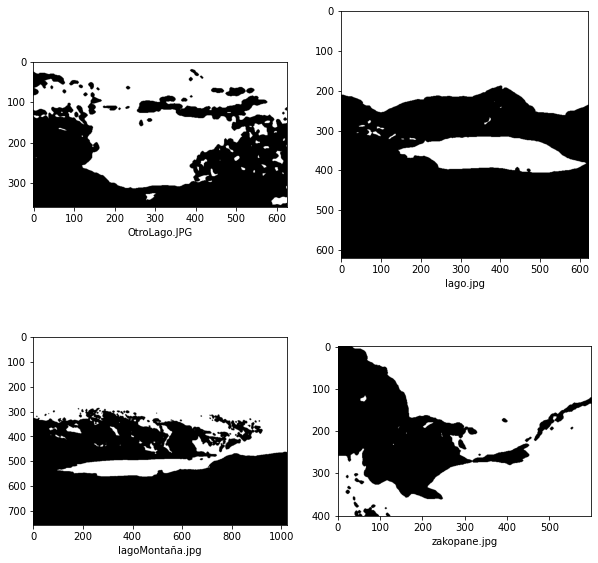

In [19]:
k_means = KMeansSegmenter()
kmeans_segmentations = []

for idx, path in enumerate(images_paths):
    image = plt.imread(path)
    segmentation = k_means.segmentacion(image)
    kmeans_segmentations.append(segmentation)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.imshow(kmeans_segmentations[0], 'gray')
ax1.set(xlabel=filenames[0])
ax2.imshow(kmeans_segmentations[1], 'gray')
ax2.set(xlabel=filenames[1])
ax3.imshow(kmeans_segmentations[2], 'gray')
ax3.set(xlabel=filenames[2])
ax4.imshow(kmeans_segmentations[3], 'gray')
ax4.set(xlabel=filenames[3])

plt.show()

# Quickshift
Es un algoritmo de segmentación que se basa en la variación de la iluminación de imágenes en color

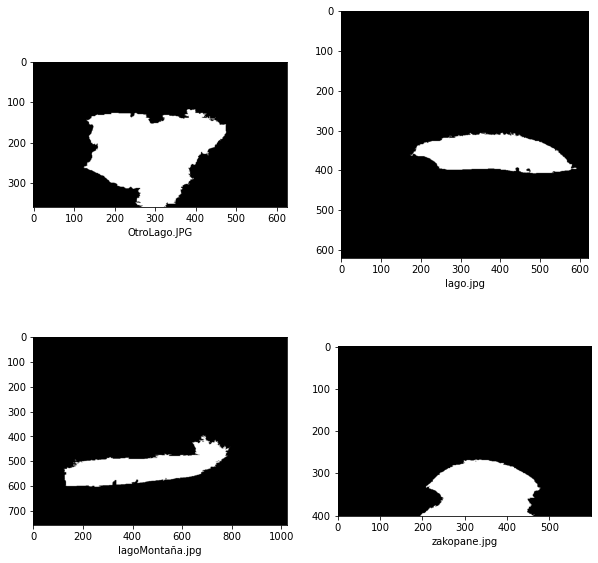

In [16]:
quickshift = QuickShift()
quickshift_segmentations = []

for idx, path in enumerate(images_paths):
    image = plt.imread(path)
    segmentation = quickshift.segment_image(image, filenames[idx])
    quickshift_segmentations.append(segmentation)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.imshow(quickshift_segmentations[0], 'gray')
ax1.set(xlabel=filenames[0])

ax2.imshow(quickshift_segmentations[1], 'gray')
ax2.set(xlabel=filenames[1])

ax3.imshow(quickshift_segmentations[2], 'gray')
ax3.set(xlabel=filenames[2])

ax4.imshow(quickshift_segmentations[3], 'gray')
ax4.set(xlabel=filenames[3])

plt.show()

# Felzenswab


In [13]:
np.random.seed(42)

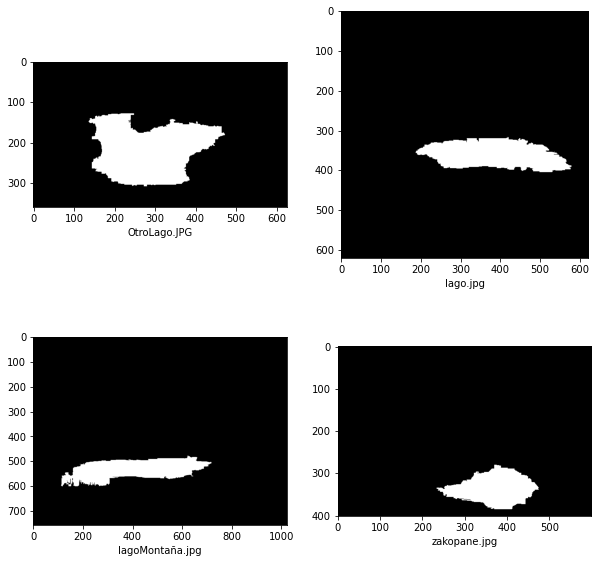

In [15]:
points_list = [[200, 290],
               [380, 360],
               [540, 355],
               [340, 330]]
felz_segmentations = []

for i in range(4):
    felzenswab = Felzenswab(filenames[i], points_list[i])
    felz_segmentations.append(felzenswab.mask())
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.imshow(felz_segmentations[0], 'gray')
ax1.set(xlabel=filenames[0])

ax2.imshow(felz_segmentations[1], 'gray')
ax2.set(xlabel=filenames[1])

ax3.imshow(felz_segmentations[2], 'gray')
ax3.set(xlabel=filenames[2])

ax4.imshow(felz_segmentations[3], 'gray')
ax4.set(xlabel=filenames[3])

plt.show()

# SuperSegmenter
El super segmentador tiene como entrada las mascaras generadas por los diferentes segmentadores para una imagen. Funciona de tal forma que para cada píxel realiza una votación entre los valores de las diferentes máscaras para ese píxel, eligiendo el voto mayoritario.

In [21]:
predicted_masks = []

for i in range(4):
    predicted_masks.append([active_contours_segmentations[i], kmeans_segmentations[i],
                            quickshift_segmentations[i], felz_segmentations[i]])

final_masks = []

for masks in predicted_masks:
    super_segmenter = SuperSegmenter(masks, masks[0].shape)
    final_masks.append(super_segmenter.generate_mask())

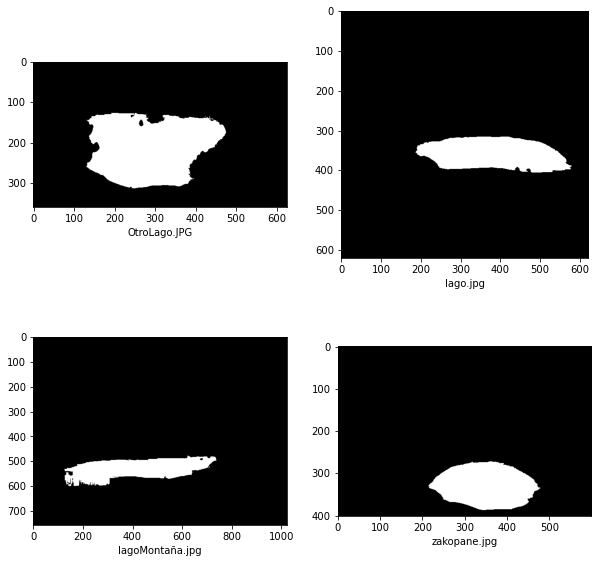

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.imshow(final_masks[0], 'gray')
ax1.set(xlabel=filenames[0])

ax2.imshow(final_masks[1], 'gray')
ax2.set(xlabel=filenames[1])

ax3.imshow(final_masks[2], 'gray')
ax3.set(xlabel=filenames[2])

ax4.imshow(final_masks[3], 'gray')
ax4.set(xlabel=filenames[3])

plt.show()

In [29]:
ground_truths = [generate_ground_truth_mask(filename) for filename in mask_paths]

for idx, y_test in enumerate(ground_truths):
    print(f'{filenames[idx]} DICE score: {dice_score(ground_truths[idx], final_masks[idx])}')

OtroLago.JPG DICE score: 0.930113875157604
lago.jpg DICE score: 0.9410631955116929
lagoMontaña.jpg DICE score: 0.8002265754071277
zakopane.jpg DICE score: 0.9244815916782121


# Conclusiones
El super segmentador realiza el voto mayoritario entre las máscaras generadas por cuatro segmentadores diferentes: Active Contours, K-Means, Quickshift y Felzenswab. 

Hemos observado que en algunas imágenes el rendimiento del super segmentador es inferior a la de alguno de los segmentadores individuales. Esto se debe a que si la mayoría de los segmentadores generan predicciones erróneas, estos resultados tendrán gran influencia en la segmentación del super segmentador.